#Linear Regression Recap

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#Import the Dataset: Product Sales Data/Product_sales.csv
sales=pd.read_csv("https://raw.githubusercontent.com/cmvigneswaranaero-gif/ML-DL/refs/heads/main/linear%20vs%20logistic%20_Product_sales.csv")

In [9]:
import sklearn as sk
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(sales[["Age"]], sales[["Bought"]])


LinearRegression()

In [ ]:
print("intercept",lr.intercept_)
print("Co-efficient",lr.coef_)

intercept [-0.17041247]
Co-efficient [[0.02094213]]


In [ ]:
d1=pd.DataFrame({"Age":[4]})
predict1=lr.predict(d1)
print(predict1)

[[-0.08664394]]


In [ ]:
#If Age is 105 then will that customer buy the product?
d2=pd.DataFrame({"Age":[105]})
predict2=lr.predict(d2)
print(predict2)

[[2.02851132]]


## Drawing Linear Regression line

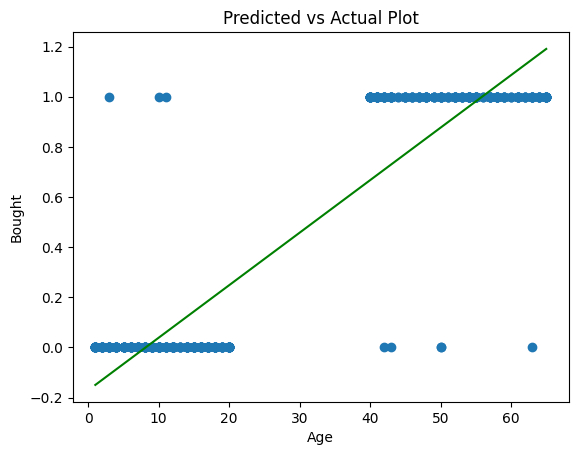

In [10]:
new_data=sales.drop(["Bought"], axis=1)
#Pass the variables to get the predicted values. Add actual values in a new column
new_data["pred_values"]= lr.predict(new_data)
new_data["Actual"]=sales["Bought"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["Age"], new_data["Actual"])
plt.plot(new_data["Age"], new_data["pred_values"], color='green')
#Add lables and title
plt.title('Predicted vs Actual Plot')
plt.xlabel('Age')
plt.ylabel('Bought')
plt.show()

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(sales[["Age"]],sales["Bought"])

LogisticRegression()

In [ ]:
print("Intercept", logistic.intercept_)
print("Coefficient", logistic.coef_)

Intercept [-6.90722429]
Coefficient [[0.21777169]]


In [ ]:
#A 4 years old customer, will he buy the product?

predict_age1=logistic.predict(d1)
print(predict_age1)

[0]


In [ ]:
#If Age is 105 then will that customer buy the product?

predict_age2=logistic.predict(d2)
print(predict_age2)

[1]


## Drawing Logistic Regression line

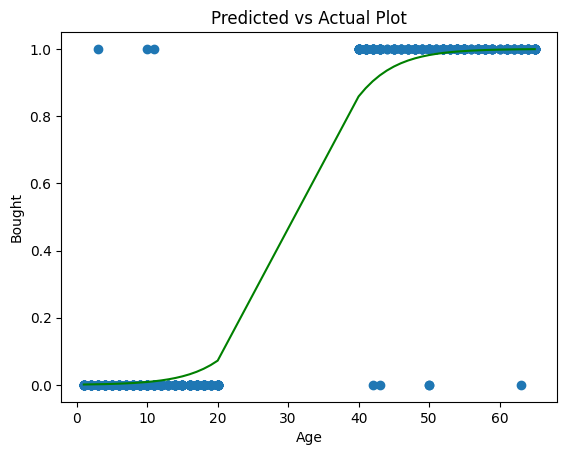

In [12]:
new_data=sales.drop(["Bought"], axis=1)
#Pass the variables to get the predicted values. Add actual values in a new column
new_data["pred_values"]= logistic.predict_proba(new_data)[:,1]
new_data["Actual"]=sales["Bought"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["Age"], new_data["Actual"])
plt.plot(new_data["Age"], new_data["pred_values"], color='green')
#Add lables and title
plt.title('Predicted vs Actual Plot')
plt.xlabel('Age')
plt.ylabel('Bought')
plt.show()

# Multiple Logistic Regression

In [13]:
Fiber=pd.read_csv("https://raw.githubusercontent.com/cmvigneswaranaero-gif/ML-DL/refs/heads/main/logistic%20_regression.csv")


In [5]:
Fiber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   active_cust                 100000 non-null  int64
 1   income                      100000 non-null  int64
 2   months_on_network           100000 non-null  int64
 3   Num_complaints              100000 non-null  int64
 4   number_plan_changes         100000 non-null  int64
 5   relocated                   100000 non-null  int64
 6   monthly_bill                100000 non-null  int64
 7   technical_issues_per_month  100000 non-null  int64
 8   Speed_test_result           100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


In [14]:
logistic1= LogisticRegression()
###fitting logistic regression for active customer on rest of the variables#######
logistic1.fit(Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']],Fiber[['active_cust']])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Intercept", logistic1.intercept_)
print("Coefficients", logistic1.coef_)

Intercept [-0.01100601]
Coefficients [[ 3.71249380e-05  2.55962690e-02  7.37975743e-01 -2.63294380e-01
  -1.42452436e-01  7.87918595e-05 -2.64241712e-01 -7.63137265e-02]]


# Confusion Matrix & Accuracy

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [20]:
predict1=logistic1.predict(Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
print("Predicted y values:")
print(predict1)

cm1 = confusion_matrix(Fiber[['active_cust']],predict1)
print("Confusion Matrix:\n", cm1)

Predicted y values:
[1 1 0 ... 1 1 1]
Confusion Matrix:
 [[33852  8289]
 [ 6143 51716]]


In [21]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)


col sums [39995 60005]
Total 100000


In [22]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

np.float64(0.85568)

# Multicollinearity

In [23]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [24]:
vif_cal(input_data=Fiber, dependent_col="active_cust")

income  VIF =  1.02
months_on_network  VIF =  1.04
Num_complaints  VIF =  1.17
number_plan_changes  VIF =  11.98
relocated  VIF =  1.61
monthly_bill  VIF =  1.0
technical_issues_per_month  VIF =  11.44
Speed_test_result  VIF =  1.14


In [25]:
#Drop the variable with highest VIF
vif_cal(input_data=Fiber.drop("number_plan_changes", axis=1), dependent_col="active_cust")

income  VIF =  1.02
months_on_network  VIF =  1.04
Num_complaints  VIF =  1.17
relocated  VIF =  1.55
monthly_bill  VIF =  1.0
technical_issues_per_month  VIF =  1.49
Speed_test_result  VIF =  1.14


# Individual Impact of Variables

In [27]:
import statsmodels.api as sm
m1=sm.Logit(Fiber['active_cust'],Fiber[["income"]+['months_on_network']+['Num_complaints']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.297056
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99993
Method:                           MLE   Df Model:                            6
Date:                Mon, 01 Sep 2025   Pseudo R-squ.:                  0.5636
Time:                        08:47:25   Log-Likelihood:                -29706.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

In [ ]:
m1=sm.Logit(Fiber['active_cust'],Fiber[["income"]+['months_on_network']+['Num_complaints']+['relocated']+['technical_issues_per_month']+['Speed_test_result']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.297061
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297061
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99994
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Sep 2025   Pseudo R-squ.:                  0.5636
Time:                        05:41:12   Log-Likelihood:                -29706.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

# Rank Ordering of the impactful variables

In [28]:
m1=sm.Logit(Fiber['active_cust'],Fiber[["income"]+['months_on_network']+['Num_complaints']+['relocated']+['technical_issues_per_month']+['Speed_test_result']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.297061
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297061
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99994
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Sep 2025   Pseudo R-squ.:                  0.5636
Time:                        08:47:31   Log-Likelihood:                -29706.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------